**Automatidata – TLC NYC Exploratory Data Analysis Project (Course 3)**

**Project Summary**

This notebook demonstrates exploratory data analysis skills from Course 3 (Go Beyond the Numbers: Translate Data into Insights) of the Google Advanced Data Analytics program.

The analysis examines NYC Yellow Taxi trip data to identify data quality issues, fare and tip patterns, temporal trends, and location-related behaviors. The goal is to translate data patterns into insights for operational improvements.

**Table of Contents:**



1- Import necessary libraries & load the dataset.

2- Exploratory Data Analysis

3- Data Cleaning

4- Visual Exploration & Insights

   * 4.1- Checking outliers



   * 4.2- Exploring other variables



5- Time-based trends

6- Spatial Trends (Drop-off locations)

7- Key Findings & Insights



---



**1- Import necessary libraries & load the dataset.**

In [1]:
#This line is only run if we want to import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data & Research 📉/Courses/Google Advanced Analytics Certificate/3- Go beyond the numbers/Project/Code/2017_Yellow_Taxi_Trip_Data.csv')

**2- Exploratory Data Analysis**

In [4]:
df.head(5)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
df.size

408582

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Primary Insights:**

* The data types are mostly numeric (float & int), with 3 columns (tpep_pickup_datetime, tpep_dropoff_datetime, store_and_fwd_flag) incorrectly stored as objects.

* The fare distribution is highly skewed. The maximum fare is 999.99 far above the 75th percentile ~$14.50, indicating extreme outliers.

* Both fare_amount and total_amount contain negative minimum values (e.g.,  −120.30 ), which are logically invalid for a trip charge and likely represent data errors or refunds.

* The maximum value of the trip_distance is  ≈  34 miles, which is significantly higher than the average ( ≈  3 miles). These long trips are probably airport rides.



**3- Data Cleaning**

In [8]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

**4- Visual Exploration & Insights**

4.1- Checking outliers

**a) Total amount**

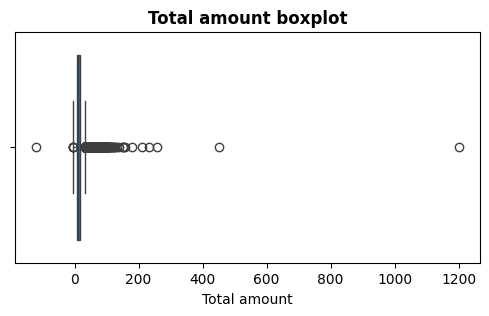

In [39]:
# Create box plot of total_amount
plt.figure(figsize=(6,3))
plt.title('Total amount boxplot', fontweight= 'bold')
plt.xlabel('Total amount')
sns.boxplot(x=df['total_amount']);

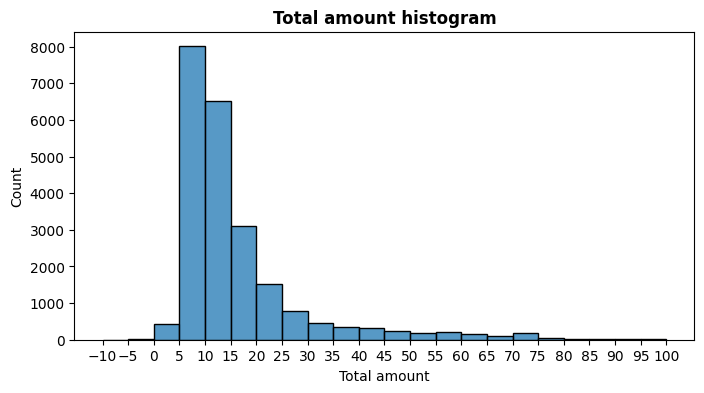

In [38]:
# Create histogram of total_amount
plt.figure(figsize=(8,4))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
plt.xlabel('Total amount')
plt.title('Total amount histogram', fontweight= 'bold');

The majority of rides have an average total fare amount of $5-15 while a few number of rides were recorded with high total amount, these rides are probably of long distances or during rush hours.

**b) Trip distance**

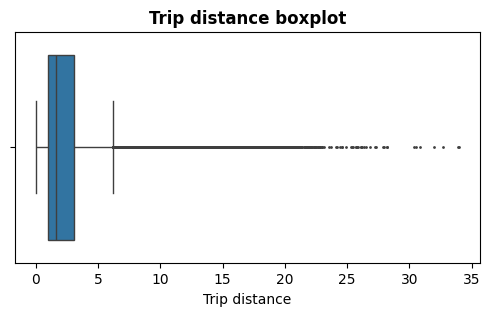

In [40]:
# Create box plot of trip_distance
plt.figure(figsize=(6,3))
plt.title('Trip distance boxplot', fontweight= 'bold')
plt.xlabel('Trip distance')
sns.boxplot(x=df['trip_distance'], fliersize=1);

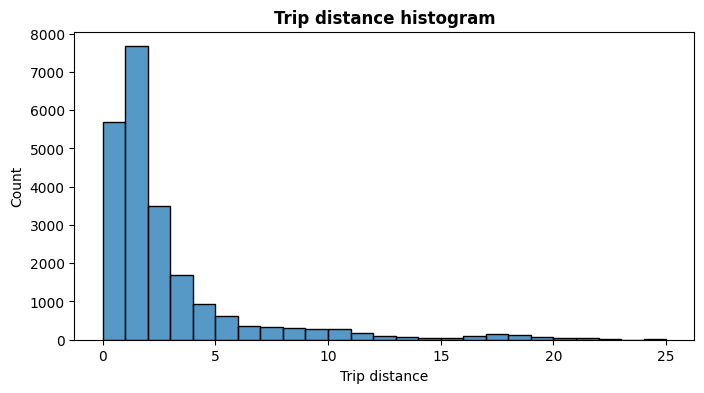

In [41]:
# Create histogram of trip_distance
plt.figure(figsize=(8,4))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.xlabel('Trip distance')
plt.title('Trip distance histogram', fontweight= 'bold');

Most of the trips were rides of less than two miles, indicating that the majority of rides are short-distance city trips. We can notice that the distribution is right skewed where few rides had significantly long trip distances.

**c) Tip amount**

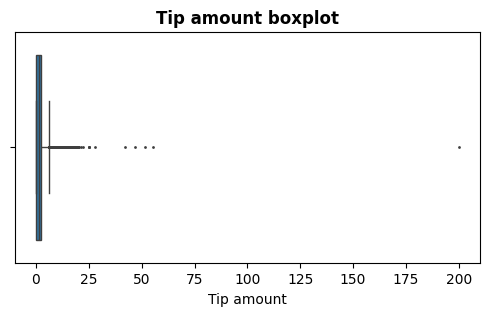

In [42]:
# Create box plot of tip_amount
plt.figure(figsize=(6,3))
plt.title('Tip amount boxplot', fontweight= 'bold')
plt.xlabel('Tip amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

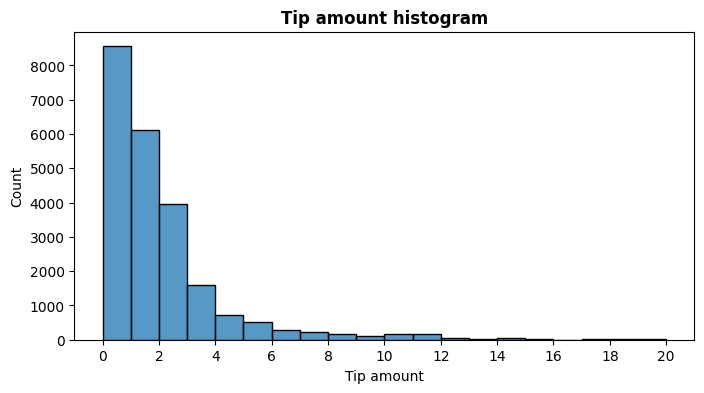

In [43]:
# Create histogram of tip_amount
plt.figure(figsize=(8,4))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
plt.xlabel('Tip amount')
plt.title('Tip amount histogram', fontweight= 'bold');

Just like the total amount, the distribution for tip amount is right-skewed, where the majority of tips are in the $0-3 range.

4.2- Exploring other variables

**Tip amount by vendor**

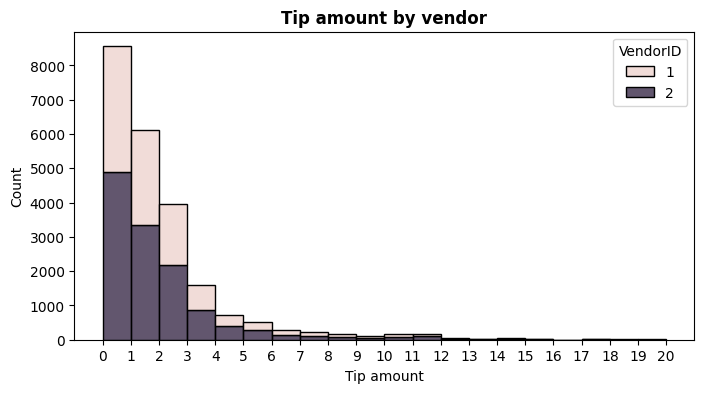

In [44]:
# Create a histogram of the tip_amount by vendor
plt.figure(figsize=(8,4))
ax = sns.histplot(data=df, x='tip_amount', hue='VendorID', bins=range(0,21,1), multiple='stack',)
ax.set_xticks(range(0,21,1))
plt.xlabel('Tip amount')
plt.title('Tip amount by vendor', fontweight= 'bold');

Eventhough vendor 2 has a slightly higher number of rides, there is no noticeable difference in the distribution of tips between the two vendors.

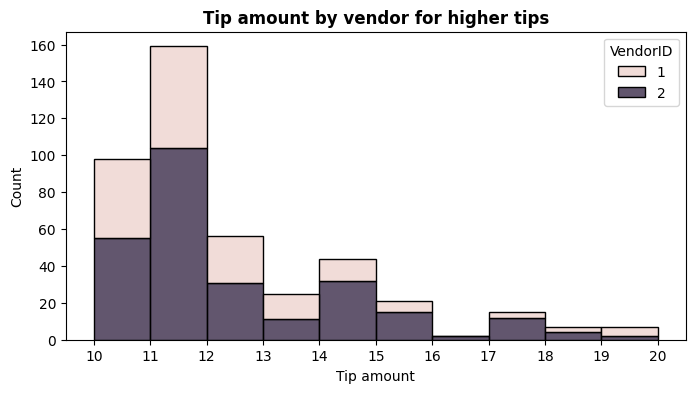

In [45]:
# Check the tip_amount by vendor for tips > $10
tips_over_10 = df[df['tip_amount'] > 10]
plt.figure(figsize=(8,4))
plt.xlabel('Tip amount')
plt.title('Tip amount by vendor for higher tips', fontweight= 'bold')
ax = sns.histplot(data=tips_over_10, x='tip_amount', hue='VendorID', multiple='stack', bins=range(10,21,1))
ax.set_xticks(range(10,21,1));

The distribution here of higher tip amounts confirms the previous finding that the proportions are almost equal with vendor 2 having more rides.

**Mean tips by passenger count**

In [17]:
#Examine the unique values in the `passenger_count` column.
df['passenger_count'].value_counts()

,count
passenger_count,
1,16117
2,3305
5,1143
3,953
6,693
4,455
0,33


Around two thirds of the rides had only one passenger and we notice that there are 33 trips with 0 passengers which is probably a data collection error.

In [18]:
# Calculate mean tips by passenger_count
mean_tips_by_pass_count = df.groupby(['passenger_count'])['tip_amount'].mean()
mean_tips_by_pass_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


There doesn't seem to be a big variation in the average tip amount by passenger count but it's worth mentioning that rides with four passengers recorded the least tip amount.

**5- Time-based trends**

**Create month and day columns**

In [19]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df.head(2)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday


**Plot total ride count by month**

In [20]:
# Get total number of rides for each month
rides_by_month = df['month'].value_counts()
rides_by_month

,count
month,
March,2049
October,2027
April,2019
May,2013
January,1997
June,1964
December,1863
November,1843
February,1769


In [21]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = rides_by_month.reindex(index=month_order)
monthly_rides

,count
month,
January,1997
February,1769
March,2049
April,2019
May,2013
June,1964
July,1697
August,1724
September,1734


/tmp/ipython-input-2285345437.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


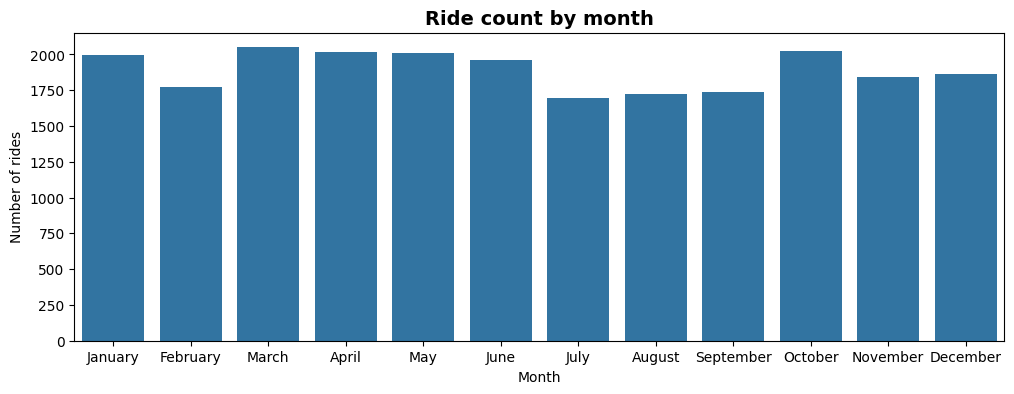

In [46]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,4))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.title('Ride count by month', fontsize=14, fontweight= 'bold');

There is no noticeable variation in the number of rides by month, we can see though that July, August, and September had the least share of rides.

**Plot total ride count by day**

In [23]:
# Repeat the above process, this time for rides by day
rides_by_day = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = rides_by_day.reindex(index=day_order)
daily_rides

,count
day,
Monday,2931
Tuesday,3198
Wednesday,3390
Thursday,3402
Friday,3413
Saturday,3367
Sunday,2998


/tmp/ipython-input-1745053500.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


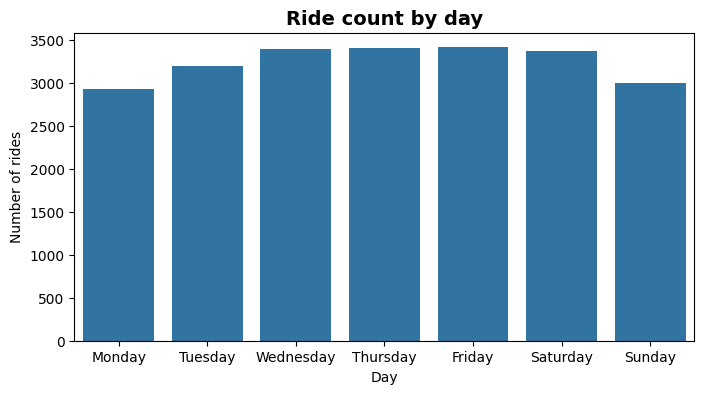

In [47]:
# Create bar plot for ride count by day
plt.figure(figsize=(8,4))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.title('Ride count by day', fontsize=14, fontweight= 'bold');

Wednesday, Thursday, and Friday had the highest number of rides. On the other hand, Sunday and Monday were the least busy days in term of rides.

**Plot total revenue by day of the week**

In [25]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


/tmp/ipython-input-223674012.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


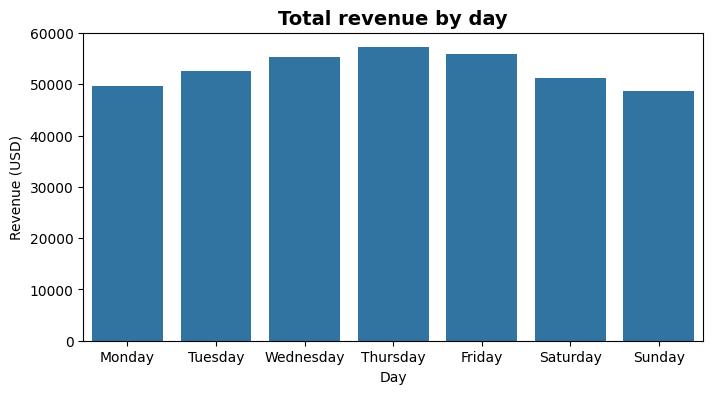

In [48]:
# Create bar plot of total revenue by day
plt.figure(figsize=(8,4))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.xlabel('Day')
plt.title('Total revenue by day', fontsize=14, fontweight= 'bold');

Having the least number of rides, Sunday and Monday also had the least amount of revenue and Thursday recorded the highest amount of total revenue.

**Plot total revenue by month**

In [27]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


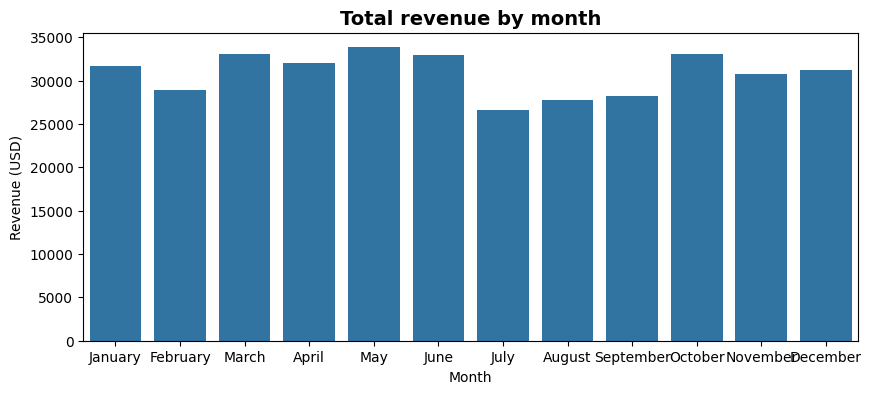

In [49]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(10,4))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.title('Total revenue by month', fontsize=14, fontweight= 'bold');

The pattern noticed in the monthly rides count can also be seen here where July, August, and September recorded the least total revenue.

**6- Spatial Trends (Drop-off locations)**

**Plot mean trip distance by drop-off location**

In [ ]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [30]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID')[['trip_distance']].mean()

# Sort the results in ascending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


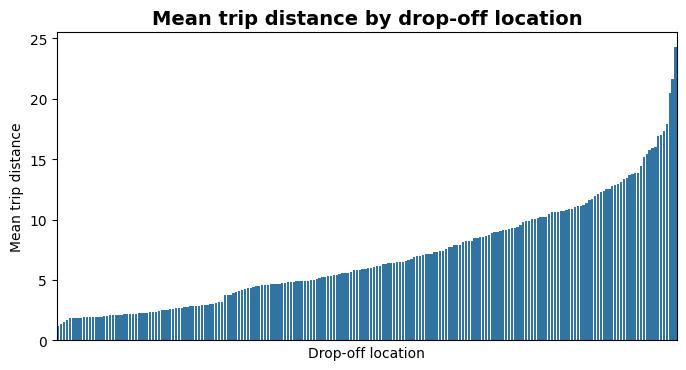

In [50]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(8,4))
ax = sns.barplot(x=distance_by_dropoff.index, y=distance_by_dropoff['trip_distance'], order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.xlabel('Drop-off location')
plt.ylabel('Mean trip distance')
plt.title('Mean trip distance by drop-off location', fontsize=14, fontweight= 'bold');

**Histogram of rides by drop-off location**

In [ ]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

There are 49 numbers that do not represent a drop-off location.

Because drop-off locations are not consecutive integers, converting them to strings prevents gaps in the histogram and allows histplot to visualize all categories contiguously.

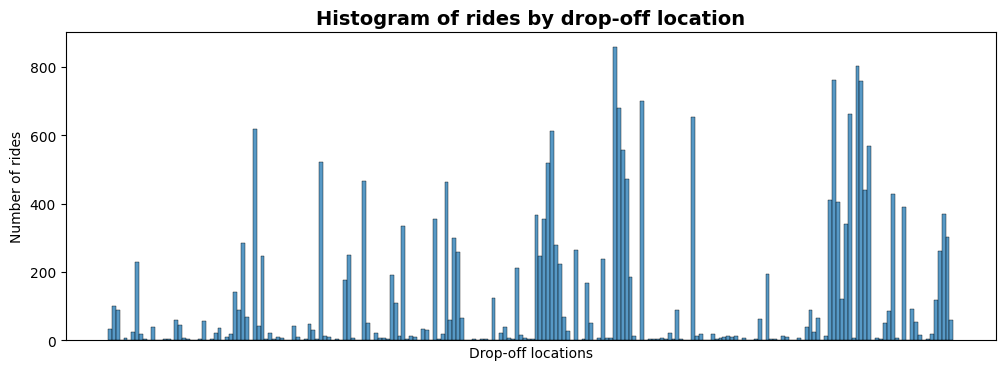

In [51]:
plt.figure(figsize=(12,4))
# Sort the DOLocationID column in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()

# Convert to string so that the bars appear next to each other.
sorted_dropoffs = sorted_dropoffs.astype('str')

sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
#to remove clutter, hide the x ticks
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.ylabel('Number of rides')
plt.title('Histogram of rides by drop-off location', fontsize=14, fontweight= 'bold');

Even though there are more than 200 drop-off locations, only few locations have most of the traffic, it's possible that these locations represent popular places such as airports and train stations or tourist attractions such as Times Square.

**7- Key Findings & Insights**
- Some variables like the fare amount and total amount have extreme values which should be dealt with before building a predictive model.

- There are 33 trips with 0 passengers which doesn't make sense, this is probably a mistake in data recording.

- The month and day don't really have that big of an effect on the number of rides as well as the total revenue.

- Out of more than 200 destinations only few ones recieve the highest traffic. the company can ask if there is available data of the real locations that correspond to these codes, this way the team can investigate why certain locations have more traffic than others.

- Since we have both the drop off and pickup times, we can calculate the trip duration and investigate whether there is a correlation between the duration and fare amount.


